In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

plt.rc('font', family='AppleGothic')

In [33]:
df = pd.read_csv('./makeDataset/dataset/processedData/36_0.8.csv')
df
data = df
use_cols = ['총인구수(명)', '유치원 수', '출생건수', '사망건수', '혼인건수', '이혼건수', '학령인구(명)']

df.head()

,Unnamed: 0,행정구역(시도),행정구역(시군구),연도,총인구수(명),유치원 수,초등학교 수,출생건수,사망건수,혼인건수,이혼건수,학령인구(명),총인구수-학령인구(명),행정구역
0,0,서울특별시,종로구,2010,213136.033855,21.461590,16.137676,1593.614123,986.888253,1328.453430,486.032515,29164,175522.211457,서울특별시 종로구
1,1,서울특별시,중구,2010,183896.871826,18.338199,14.572067,1643.769981,845.166413,1360.111050,471.952108,19628,153699.699286,서울특별시 중구
2,2,서울특별시,용산구,2010,275194.052247,23.284195,17.064949,2585.903994,1177.695609,1969.249574,594.916883,37318,230433.335750,서울특별시 용산구
3,3,서울특별시,성동구,2010,327540.036909,32.951854,21.054258,3033.709868,1301.920746,2378.813889,715.669276,51562,271347.549625,서울특별시 성동구
4,4,서울특별시,광진구,2010,388530.424034,42.167027,23.114977,3515.990476,1363.950642,2733.688427,836.511920,67422,317702.724659,서울특별시 광진구


In [34]:
df = df.drop('Unnamed: 0', axis=1)

In [35]:
df['행정구역'].value_counts()

행정구역
서울특별시 종로구       13
전라북도 장수군        13
충청남도 예산군        13
충청남도 태안군        13
전라북도 전주시        13
                ..
경기도 동두천시        13
경기도 안산시         13
경기도 고양시         13
경기도 과천시         13
제주특별자치도 서귀포시    13
Name: count, Length: 223, dtype: int64

In [36]:
# 데이터 전처리
scaler = MinMaxScaler()
df[use_cols] = scaler.fit_transform(df[use_cols])

/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/skl

In [37]:
# 연도가 2013부터 2020까지인 데이터 추출
filtered_df = df[(df['연도'] >= 2010) & (df['연도'] <= 2021)]

# 결과 출력
print(filtered_df)

     행정구역(시도) 행정구역(시군구)    연도   총인구수(명)     유치원 수     초등학교 수      출생건수  \
0       서울특별시       종로구  2010  0.197237  0.095333  16.137676  0.150138   
1       서울특별시        중구  2010  0.169005  0.076077  14.572067  0.154923   
2       서울특별시       용산구  2010  0.257159  0.106569  17.064949  0.244811   
3       서울특별시       성동구  2010  0.307703  0.166171  21.054258  0.287536   
4       서울특별시       광진구  2010  0.366594  0.222982  23.114977  0.333550   
...       ...       ...   ...       ...       ...        ...       ...   
2671     경상남도       함양군  2021  0.029841  0.040081  13.442521  0.008655   
2672     경상남도       거창군  2021  0.045256  0.055808  16.063477  0.015301   
2673     경상남도       합천군  2021  0.038503  0.058090  16.795360  0.012558   
2674  제주특별자치도       제주시  2021  0.407803  0.403204  63.400000  0.234669   
2675  제주특별자치도      서귀포시  2021  0.228535  0.281137  49.600000  0.117201   

          사망건수      혼인건수      이혼건수   학령인구(명)   총인구수-학령인구(명)          행정구역  
0     0.164209  0.181230  0.216436 

In [38]:
filtered_df

,행정구역(시도),행정구역(시군구),연도,총인구수(명),유치원 수,초등학교 수,출생건수,사망건수,혼인건수,이혼건수,학령인구(명),총인구수-학령인구(명),행정구역
0,서울특별시,종로구,2010,0.197237,0.095333,16.137676,0.150138,0.164209,0.181230,0.216436,0.116964,175522.211457,서울특별시 종로구
1,서울특별시,중구,2010,0.169005,0.076077,14.572067,0.154923,0.139156,0.185652,0.209911,0.077754,153699.699286,서울특별시 중구
2,서울특별시,용산구,2010,0.257159,0.106569,17.064949,0.244811,0.197940,0.270738,0.266896,0.150492,230433.335750,서울특별시 용산구
3,서울특별시,성동구,2010,0.307703,0.166171,21.054258,0.287536,0.219901,0.327946,0.322856,0.209060,271347.549625,서울특별시 성동구
4,서울특별시,광진구,2010,0.366594,0.222982,23.114977,0.333550,0.230867,0.377516,0.378858,0.274273,317702.724659,서울특별시 광진구
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2671,경상남도,함양군,2021,0.029841,0.040081,13.442521,0.008655,0.093924,0.006214,0.026954,0.015144,35097.692951,경상남도 함양군
2672,경상남도,거창군,2021,0.045256,0.055808,16.063477,0.015301,0.108568,0.013025,0.043418,0.034021,47862.492130,경상남도 거창군
2673,경상남도,합천군,2021,0.038503,0.058090,16.795360,0.012558,0.121264,0.010027,0.033393,0.011908,43888.671918,경상남도 합천군
2674,제주특별자치도,제주시,2021,0.407803,0.403204,63.400000,0.234669,0.445487,0.232011,0.425983,0.352866,356271.400000,제주특별자치도 제주시


In [39]:
# 시퀀스 데이터 생성
def create_sequence_data(data, sequence_length):
    sequences = []
    for region in data['행정구역'].unique().tolist():
        temp_df = data[data['행정구역'] == region]
        if len(temp_df) < sequence_length:
            continue

        temp_df = temp_df[use_cols]
        for i in range(len(temp_df) - sequence_length):
            seq = temp_df[i:i+sequence_length+1]
            sequences.append(seq)
    return np.array(sequences)

In [40]:
sequence_length = 3  # 시퀀스 길이
sequences = create_sequence_data(filtered_df, sequence_length)

In [41]:
sequences.shape

(2007, 4, 7)

In [42]:
# 데이터셋 분리
X = sequences[:, :-1]
y = sequences[:, -1][:, -1]

In [43]:
# 훈련/검증 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [44]:
def invTransform(scaler, data, colName, colNames):
    dummy = pd.DataFrame(np.zeros((len(data), len(colNames))), columns=colNames)
    dummy[colName] = data
    dummy = pd.DataFrame(scaler.inverse_transform(dummy), columns=colNames)
    return dummy[colName].values

In [45]:
# MAPE 계산 함수
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [46]:
  
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
  
# EarlyStopping 콜백 정의
early_stopping = EarlyStopping(
    monitor='val_loss',  # 검증 손실을 모니터링
    patience=100,        # 151 에포크 동안 개선되지 않으면 중단
    min_delta=0.0000005,     # 개선으로 간주되기 위한 최소 변화량
    restore_best_weights=True  # 가장 좋은 모델의 가중치를 복원
)

# ReduceLROnPlateau 콜백 정의
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.3, 
    patience=30,         # 30 에포크 동안 개선되지 않으면 학습률을 30%로 감소
    min_delta=0.0000005
)

In [47]:
X.shape

(2007, 3, 7)

In [48]:
from tqdm import tqdm
# Specify the number of iterations
num_iterations = 100
mape_list = []
min_mape = float('inf')  # Initialize with positive infinity

for iteration in tqdm(range(num_iterations)):
    # Create the model
    model = Sequential()
    model.add(LSTM(40, activation='tanh', input_shape=(X.shape[1], X.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    # Fit the model
    model.fit(
        X_train, y_train,
        epochs=1000,
        verbose=1,
        callbacks=[early_stopping, reduce_lr],  # 콜백 리스트에 추가
        validation_data=(X_test, y_test)  # 검증 데이터셋 제공
    )

    # Predict
    predicted_data = model.predict(X_test)
    predicted_data = invTransform(scaler, predicted_data, '학령인구(명)', use_cols).reshape(-1, 1)
    predicted_data = predicted_data.round()
    y_true = invTransform(scaler, y_test, '학령인구(명)', use_cols).reshape(-1, 1)

    # Evaluate MAPE
    mape = calculate_mape(y_true, predicted_data)
    print(f'{iteration}th: Mean Absolute Percentage Error (MAPE): {mape:.2f}%')
    mape_list.append(mape)


    # Check if the current MAPE is the new minimum
    if mape < min_mape:
        min_mape = mape
        # Save the model when a new minimum is reached
        model.save('best_model.keras')

    # Optionally, you can plot the results for each iteration
    # plt.plot(range(len(y_true)), y_true, label='True')
    # plt.plot(range(len(predicted_data)), predicted_data, label='Predicted', linestyle='--')
    # plt.xlabel('Test Case')
    # plt.ylabel('School_Age_Population')
    # plt.legend()
    # plt.show()

# Calculate and print the average and minimum MAPE
average_mape = np.mean(mape_list)
print(f'Average Mean Absolute Percentage Error (MAPE) over {num_iterations} iterations: {average_mape:.2f}%')
print(f'Minimum Mean Absolute Percentage Error (MAPE) over {num_iterations} iterations: {min_mape:.2f}%')

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1/1000
51/51 [==============================] - 3s 26ms/step - loss: 0.0068 - val_loss: 5.3429e-04 - lr: 0.0010
Epoch 2/1000
51/51 [==============================] - 1s 14ms/step - loss: 0.0016 - val_loss: 4.2859e-04 - lr: 0.0010
Epoch 3/1000
51/51 [==============================] - 1s 14ms/step - loss: 0.0010 - val_loss: 2.9207e-04 - lr: 0.0010
Epoch 4/1000
51/51 [==============================] - 1s 15ms/step - loss: 6.0374e-04 - val_loss: 2.4079e-04 - lr: 0.0010
Epoch 5/1000
51/51 [==============================] - 1s 14ms/step - loss: 2.8261e-04 - val_loss: 1.4317e-04 - lr: 0.0010
Epoch 6/1000
51/51 [==============================] - 1s 13ms/step - loss: 1.8802e-04 - val_loss: 1.7089e-04 - lr: 0.0010
Epoch 7/1000
51/51 [==============================] - 1s 13ms/step - loss: 1.4347e-04 - val_loss: 7.8272e-05 - lr: 0.0010
Epoch 8/1000
51/51 [==============================] - 1s 13ms/step - loss: 1.0742e-04 - val_loss: 4.7693e-05 - lr: 0.0010
Epoch 9/1000
51/51 [================

/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/skl

0th: Mean Absolute Percentage Error (MAPE): 2.44%
Epoch 1/1000
51/51 [==============================] - 3s 23ms/step - loss: 0.0127 - val_loss: 0.0013 - lr: 0.0010
Epoch 2/1000
51/51 [==============================] - 1s 15ms/step - loss: 0.0018 - val_loss: 4.4776e-04 - lr: 0.0010
Epoch 3/1000
51/51 [==============================] - 1s 13ms/step - loss: 0.0013 - val_loss: 3.0590e-04 - lr: 0.0010
Epoch 4/1000
51/51 [==============================] - 1s 14ms/step - loss: 9.0812e-04 - val_loss: 2.2598e-04 - lr: 0.0010
Epoch 5/1000
51/51 [==============================] - 1s 13ms/step - loss: 4.9580e-04 - val_loss: 1.2412e-04 - lr: 0.0010
Epoch 6/1000
51/51 [==============================] - 1s 13ms/step - loss: 2.1716e-04 - val_loss: 8.5022e-05 - lr: 0.0010
Epoch 7/1000
51/51 [==============================] - 1s 14ms/step - loss: 1.4598e-04 - val_loss: 6.7301e-05 - lr: 0.0010
Epoch 8/1000
51/51 [==============================] - 1s 13ms/step - loss: 1.3598e-04 - val_loss: 6.6411e-05 - l

/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/skl

1th: Mean Absolute Percentage Error (MAPE): 3.13%
Epoch 1/1000
51/51 [==============================] - 2s 23ms/step - loss: 0.0095 - val_loss: 9.8918e-04 - lr: 0.0010
Epoch 2/1000
51/51 [==============================] - 1s 13ms/step - loss: 0.0019 - val_loss: 5.7706e-04 - lr: 0.0010
Epoch 3/1000
51/51 [==============================] - 1s 14ms/step - loss: 0.0015 - val_loss: 5.5933e-04 - lr: 0.0010
Epoch 4/1000
51/51 [==============================] - 1s 14ms/step - loss: 0.0011 - val_loss: 4.3413e-04 - lr: 0.0010
Epoch 5/1000
51/51 [==============================] - 1s 13ms/step - loss: 6.5708e-04 - val_loss: 2.7016e-04 - lr: 0.0010
Epoch 6/1000
51/51 [==============================] - 1s 14ms/step - loss: 3.5374e-04 - val_loss: 1.7903e-04 - lr: 0.0010
Epoch 7/1000
51/51 [==============================] - 1s 13ms/step - loss: 1.9487e-04 - val_loss: 1.1811e-04 - lr: 0.0010
Epoch 8/1000
51/51 [==============================] - 1s 13ms/step - loss: 1.5449e-04 - val_loss: 7.7860e-05 - l

/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/skl

2th: Mean Absolute Percentage Error (MAPE): 2.23%
Epoch 1/1000
51/51 [==============================] - 2s 23ms/step - loss: 0.0091 - val_loss: 8.5598e-04 - lr: 0.0010
Epoch 2/1000
51/51 [==============================] - 1s 13ms/step - loss: 0.0015 - val_loss: 4.8608e-04 - lr: 0.0010
Epoch 3/1000
51/51 [==============================] - 1s 13ms/step - loss: 0.0011 - val_loss: 4.4573e-04 - lr: 0.0010
Epoch 4/1000
51/51 [==============================] - 1s 13ms/step - loss: 8.2837e-04 - val_loss: 3.2816e-04 - lr: 0.0010
Epoch 5/1000
51/51 [==============================] - 1s 13ms/step - loss: 5.0052e-04 - val_loss: 2.3941e-04 - lr: 0.0010
Epoch 6/1000
51/51 [==============================] - 1s 12ms/step - loss: 3.0610e-04 - val_loss: 1.4553e-04 - lr: 0.0010
Epoch 7/1000
51/51 [==============================] - 1s 13ms/step - loss: 1.7708e-04 - val_loss: 1.0041e-04 - lr: 0.0010
Epoch 8/1000
51/51 [==============================] - 1s 13ms/step - loss: 1.3747e-04 - val_loss: 7.7891e-05

/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/skl

3th: Mean Absolute Percentage Error (MAPE): 2.32%
Epoch 1/1000
51/51 [==============================] - 2s 23ms/step - loss: 0.0072 - val_loss: 4.3316e-04 - lr: 0.0010
Epoch 2/1000
51/51 [==============================] - 1s 13ms/step - loss: 0.0014 - val_loss: 3.5353e-04 - lr: 0.0010
Epoch 3/1000
51/51 [==============================] - 1s 13ms/step - loss: 9.6472e-04 - val_loss: 2.4293e-04 - lr: 0.0010
Epoch 4/1000
51/51 [==============================] - 1s 13ms/step - loss: 5.0917e-04 - val_loss: 1.7534e-04 - lr: 0.0010
Epoch 5/1000
51/51 [==============================] - 1s 13ms/step - loss: 2.3713e-04 - val_loss: 1.0031e-04 - lr: 0.0010
Epoch 6/1000
51/51 [==============================] - 1s 13ms/step - loss: 1.4959e-04 - val_loss: 9.2715e-05 - lr: 0.0010
Epoch 7/1000
51/51 [==============================] - 1s 13ms/step - loss: 1.2622e-04 - val_loss: 8.7287e-05 - lr: 0.0010
Epoch 8/1000
51/51 [==============================] - 1s 12ms/step - loss: 1.1550e-04 - val_loss: 6.0129

/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/skl

4th: Mean Absolute Percentage Error (MAPE): 2.75%
Epoch 1/1000
51/51 [==============================] - 2s 23ms/step - loss: 0.0080 - val_loss: 5.7888e-04 - lr: 0.0010
Epoch 2/1000
51/51 [==============================] - 1s 13ms/step - loss: 0.0010 - val_loss: 2.6298e-04 - lr: 0.0010
Epoch 3/1000
51/51 [==============================] - 1s 13ms/step - loss: 7.0292e-04 - val_loss: 2.5738e-04 - lr: 0.0010
Epoch 4/1000
51/51 [==============================] - 1s 13ms/step - loss: 4.6944e-04 - val_loss: 2.4672e-04 - lr: 0.0010
Epoch 5/1000
51/51 [==============================] - 1s 13ms/step - loss: 3.0781e-04 - val_loss: 1.6428e-04 - lr: 0.0010
Epoch 6/1000
51/51 [==============================] - 1s 13ms/step - loss: 1.9876e-04 - val_loss: 1.1521e-04 - lr: 0.0010
Epoch 7/1000
51/51 [==============================] - 1s 13ms/step - loss: 1.4636e-04 - val_loss: 7.3141e-05 - lr: 0.0010
Epoch 8/1000
51/51 [==============================] - 1s 13ms/step - loss: 1.1705e-04 - val_loss: 9.2016

/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/skl

5th: Mean Absolute Percentage Error (MAPE): 2.49%
Epoch 1/1000
51/51 [==============================] - 2s 23ms/step - loss: 0.0097 - val_loss: 7.0538e-04 - lr: 0.0010
Epoch 2/1000
51/51 [==============================] - 1s 14ms/step - loss: 0.0015 - val_loss: 2.8530e-04 - lr: 0.0010
Epoch 3/1000
51/51 [==============================] - 1s 13ms/step - loss: 0.0011 - val_loss: 2.3506e-04 - lr: 0.0010
Epoch 4/1000
51/51 [==============================] - 1s 13ms/step - loss: 7.5893e-04 - val_loss: 1.8621e-04 - lr: 0.0010
Epoch 5/1000
51/51 [==============================] - 1s 13ms/step - loss: 4.4024e-04 - val_loss: 2.0850e-04 - lr: 0.0010
Epoch 6/1000
51/51 [==============================] - 1s 12ms/step - loss: 2.5189e-04 - val_loss: 1.3543e-04 - lr: 0.0010
Epoch 7/1000
51/51 [==============================] - 1s 13ms/step - loss: 1.6663e-04 - val_loss: 1.1594e-04 - lr: 0.0010
Epoch 8/1000
51/51 [==============================] - 1s 13ms/step - loss: 1.4817e-04 - val_loss: 1.0094e-04

/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/skl

6th: Mean Absolute Percentage Error (MAPE): 2.26%
Epoch 1/1000
51/51 [==============================] - 2s 23ms/step - loss: 0.0053 - val_loss: 6.4910e-04 - lr: 0.0010
Epoch 2/1000
51/51 [==============================] - 1s 13ms/step - loss: 0.0016 - val_loss: 4.9439e-04 - lr: 0.0010
Epoch 3/1000
51/51 [==============================] - 1s 13ms/step - loss: 0.0011 - val_loss: 3.6585e-04 - lr: 0.0010
Epoch 4/1000
51/51 [==============================] - 1s 13ms/step - loss: 7.2977e-04 - val_loss: 2.4885e-04 - lr: 0.0010
Epoch 5/1000
51/51 [==============================] - 1s 13ms/step - loss: 3.3394e-04 - val_loss: 1.4559e-04 - lr: 0.0010
Epoch 6/1000
51/51 [==============================] - 1s 13ms/step - loss: 2.0026e-04 - val_loss: 1.5821e-04 - lr: 0.0010
Epoch 7/1000
51/51 [==============================] - 1s 13ms/step - loss: 1.5965e-04 - val_loss: 8.0837e-05 - lr: 0.0010
Epoch 8/1000
51/51 [==============================] - 1s 13ms/step - loss: 1.3664e-04 - val_loss: 1.0110e-04

/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/skl

7th: Mean Absolute Percentage Error (MAPE): 2.59%
Epoch 1/1000
51/51 [==============================] - 3s 23ms/step - loss: 0.0116 - val_loss: 0.0013 - lr: 0.0010
Epoch 2/1000
51/51 [==============================] - 1s 14ms/step - loss: 0.0024 - val_loss: 6.2324e-04 - lr: 0.0010
Epoch 3/1000
51/51 [==============================] - 1s 14ms/step - loss: 0.0017 - val_loss: 5.9805e-04 - lr: 0.0010
Epoch 4/1000
51/51 [==============================] - 1s 13ms/step - loss: 0.0011 - val_loss: 3.2359e-04 - lr: 0.0010
Epoch 5/1000
51/51 [==============================] - 1s 13ms/step - loss: 5.8278e-04 - val_loss: 2.1254e-04 - lr: 0.0010
Epoch 6/1000
51/51 [==============================] - 1s 13ms/step - loss: 2.8961e-04 - val_loss: 1.4502e-04 - lr: 0.0010
Epoch 7/1000
51/51 [==============================] - 1s 13ms/step - loss: 1.8312e-04 - val_loss: 1.0602e-04 - lr: 0.0010
Epoch 8/1000
51/51 [==============================] - 1s 13ms/step - loss: 1.4115e-04 - val_loss: 8.7817e-05 - lr: 0

/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/skl

8th: Mean Absolute Percentage Error (MAPE): 2.24%
Epoch 1/1000
51/51 [==============================] - 2s 24ms/step - loss: 0.0144 - val_loss: 0.0017 - lr: 0.0010
Epoch 2/1000
51/51 [==============================] - 1s 13ms/step - loss: 0.0023 - val_loss: 7.2545e-04 - lr: 0.0010
Epoch 3/1000
51/51 [==============================] - 1s 13ms/step - loss: 0.0017 - val_loss: 7.4087e-04 - lr: 0.0010
Epoch 4/1000
51/51 [==============================] - 1s 13ms/step - loss: 0.0012 - val_loss: 6.2115e-04 - lr: 0.0010
Epoch 5/1000
51/51 [==============================] - 1s 13ms/step - loss: 7.3852e-04 - val_loss: 3.1089e-04 - lr: 0.0010
Epoch 6/1000
51/51 [==============================] - 1s 13ms/step - loss: 4.3018e-04 - val_loss: 2.4084e-04 - lr: 0.0010
Epoch 7/1000
51/51 [==============================] - 1s 12ms/step - loss: 2.2784e-04 - val_loss: 1.3570e-04 - lr: 0.0010
Epoch 8/1000
51/51 [==============================] - 1s 13ms/step - loss: 1.7550e-04 - val_loss: 1.0265e-04 - lr: 0

/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/skl

9th: Mean Absolute Percentage Error (MAPE): 2.19%
Epoch 1/1000
51/51 [==============================] - 2s 26ms/step - loss: 0.0161 - val_loss: 0.0017 - lr: 0.0010
Epoch 2/1000
51/51 [==============================] - 1s 13ms/step - loss: 0.0020 - val_loss: 3.7567e-04 - lr: 0.0010
Epoch 3/1000
51/51 [==============================] - 1s 14ms/step - loss: 0.0015 - val_loss: 3.3570e-04 - lr: 0.0010
Epoch 4/1000
51/51 [==============================] - 1s 13ms/step - loss: 0.0011 - val_loss: 2.9524e-04 - lr: 0.0010
Epoch 5/1000
51/51 [==============================] - 1s 13ms/step - loss: 7.9652e-04 - val_loss: 2.5474e-04 - lr: 0.0010
Epoch 6/1000
51/51 [==============================] - 1s 13ms/step - loss: 5.5252e-04 - val_loss: 2.0676e-04 - lr: 0.0010
Epoch 7/1000
51/51 [==============================] - 1s 13ms/step - loss: 3.7322e-04 - val_loss: 1.6660e-04 - lr: 0.0010
Epoch 8/1000
51/51 [==============================] - 1s 13ms/step - loss: 2.4763e-04 - val_loss: 1.3028e-04 - lr: 0

/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/skl

10th: Mean Absolute Percentage Error (MAPE): 2.44%
Epoch 1/1000
51/51 [==============================] - 2s 25ms/step - loss: 0.0124 - val_loss: 0.0013 - lr: 0.0010
Epoch 2/1000
51/51 [==============================] - 1s 14ms/step - loss: 0.0022 - val_loss: 5.8161e-04 - lr: 0.0010
Epoch 3/1000
51/51 [==============================] - 1s 13ms/step - loss: 0.0018 - val_loss: 4.4636e-04 - lr: 0.0010
Epoch 4/1000
51/51 [==============================] - 1s 13ms/step - loss: 0.0014 - val_loss: 3.5646e-04 - lr: 0.0010
Epoch 5/1000
51/51 [==============================] - 1s 13ms/step - loss: 0.0010 - val_loss: 2.6979e-04 - lr: 0.0010
Epoch 6/1000
51/51 [==============================] - 1s 13ms/step - loss: 6.9286e-04 - val_loss: 1.5569e-04 - lr: 0.0010
Epoch 7/1000
51/51 [==============================] - 1s 13ms/step - loss: 3.8138e-04 - val_loss: 1.4536e-04 - lr: 0.0010
Epoch 8/1000
51/51 [==============================] - 1s 13ms/step - loss: 2.1140e-04 - val_loss: 8.8713e-05 - lr: 0.00

/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/skl

11th: Mean Absolute Percentage Error (MAPE): 2.75%
Epoch 1/1000
51/51 [==============================] - 2s 25ms/step - loss: 0.0095 - val_loss: 8.1944e-04 - lr: 0.0010
Epoch 2/1000
51/51 [==============================] - 1s 13ms/step - loss: 0.0023 - val_loss: 4.1096e-04 - lr: 0.0010
Epoch 3/1000
51/51 [==============================] - 1s 13ms/step - loss: 0.0016 - val_loss: 3.6836e-04 - lr: 0.0010
Epoch 4/1000
51/51 [==============================] - 1s 12ms/step - loss: 0.0010 - val_loss: 3.5546e-04 - lr: 0.0010
Epoch 5/1000
51/51 [==============================] - 1s 12ms/step - loss: 5.9019e-04 - val_loss: 3.0063e-04 - lr: 0.0010
Epoch 6/1000
51/51 [==============================] - 1s 12ms/step - loss: 3.7758e-04 - val_loss: 3.2938e-04 - lr: 0.0010
Epoch 7/1000
51/51 [==============================] - 1s 12ms/step - loss: 2.5359e-04 - val_loss: 1.9327e-04 - lr: 0.0010
Epoch 8/1000
51/51 [==============================] - 1s 12ms/step - loss: 2.1432e-04 - val_loss: 1.1434e-04 - 

/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/skl

12th: Mean Absolute Percentage Error (MAPE): 2.30%
Epoch 1/1000
51/51 [==============================] - 2s 26ms/step - loss: 0.0100 - val_loss: 6.6860e-04 - lr: 0.0010
Epoch 2/1000
51/51 [==============================] - 1s 14ms/step - loss: 0.0011 - val_loss: 2.5042e-04 - lr: 0.0010
Epoch 3/1000
51/51 [==============================] - 1s 13ms/step - loss: 7.6088e-04 - val_loss: 2.4278e-04 - lr: 0.0010
Epoch 4/1000
51/51 [==============================] - 1s 13ms/step - loss: 5.7288e-04 - val_loss: 1.8472e-04 - lr: 0.0010
Epoch 5/1000
51/51 [==============================] - 1s 13ms/step - loss: 3.9125e-04 - val_loss: 1.8115e-04 - lr: 0.0010
Epoch 6/1000
51/51 [==============================] - 1s 13ms/step - loss: 2.7496e-04 - val_loss: 1.2400e-04 - lr: 0.0010
Epoch 7/1000
51/51 [==============================] - 1s 14ms/step - loss: 1.9762e-04 - val_loss: 9.8713e-05 - lr: 0.0010
Epoch 8/1000
51/51 [==============================] - 1s 13ms/step - loss: 1.5589e-04 - val_loss: 7.614

/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/skl

13th: Mean Absolute Percentage Error (MAPE): 2.75%
Epoch 1/1000
51/51 [==============================] - 2s 26ms/step - loss: 0.0172 - val_loss: 0.0020 - lr: 0.0010
Epoch 2/1000
51/51 [==============================] - 1s 13ms/step - loss: 0.0017 - val_loss: 3.7404e-04 - lr: 0.0010
Epoch 3/1000
51/51 [==============================] - 1s 14ms/step - loss: 0.0011 - val_loss: 3.6781e-04 - lr: 0.0010
Epoch 4/1000
51/51 [==============================] - 1s 12ms/step - loss: 8.5168e-04 - val_loss: 3.1285e-04 - lr: 0.0010
Epoch 5/1000
51/51 [==============================] - 1s 13ms/step - loss: 6.1329e-04 - val_loss: 2.8009e-04 - lr: 0.0010
Epoch 6/1000
51/51 [==============================] - 1s 12ms/step - loss: 4.2728e-04 - val_loss: 2.3980e-04 - lr: 0.0010
Epoch 7/1000
51/51 [==============================] - 1s 13ms/step - loss: 3.1296e-04 - val_loss: 2.4370e-04 - lr: 0.0010
Epoch 8/1000
51/51 [==============================] - 1s 12ms/step - loss: 2.4074e-04 - val_loss: 1.7810e-04 - 

/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/skl

14th: Mean Absolute Percentage Error (MAPE): 2.81%
Epoch 1/1000
51/51 [==============================] - 2s 26ms/step - loss: 0.0192 - val_loss: 0.0025 - lr: 0.0010
Epoch 2/1000
51/51 [==============================] - 1s 13ms/step - loss: 0.0022 - val_loss: 4.4548e-04 - lr: 0.0010
Epoch 3/1000
51/51 [==============================] - 1s 14ms/step - loss: 0.0014 - val_loss: 3.7536e-04 - lr: 0.0010
Epoch 4/1000
51/51 [==============================] - 1s 13ms/step - loss: 0.0012 - val_loss: 3.4459e-04 - lr: 0.0010
Epoch 5/1000
51/51 [==============================] - 1s 13ms/step - loss: 0.0010 - val_loss: 3.0402e-04 - lr: 0.0010
Epoch 6/1000
51/51 [==============================] - 1s 12ms/step - loss: 8.4247e-04 - val_loss: 3.0964e-04 - lr: 0.0010
Epoch 7/1000
51/51 [==============================] - 1s 13ms/step - loss: 6.8504e-04 - val_loss: 2.2607e-04 - lr: 0.0010
Epoch 8/1000
51/51 [==============================] - 1s 13ms/step - loss: 5.2603e-04 - val_loss: 1.7414e-04 - lr: 0.00

/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/skl

15th: Mean Absolute Percentage Error (MAPE): 2.54%
Epoch 1/1000
51/51 [==============================] - 3s 43ms/step - loss: 0.0212 - val_loss: 0.0023 - lr: 0.0010
Epoch 2/1000
51/51 [==============================] - 1s 13ms/step - loss: 0.0019 - val_loss: 4.6617e-04 - lr: 0.0010
Epoch 3/1000
51/51 [==============================] - 1s 14ms/step - loss: 0.0013 - val_loss: 3.8238e-04 - lr: 0.0010
Epoch 4/1000
51/51 [==============================] - 1s 13ms/step - loss: 0.0011 - val_loss: 3.6857e-04 - lr: 0.0010
Epoch 5/1000
51/51 [==============================] - 1s 15ms/step - loss: 9.0910e-04 - val_loss: 3.0165e-04 - lr: 0.0010
Epoch 6/1000
51/51 [==============================] - 1s 14ms/step - loss: 7.2736e-04 - val_loss: 2.7040e-04 - lr: 0.0010
Epoch 7/1000
51/51 [==============================] - 1s 13ms/step - loss: 5.9117e-04 - val_loss: 2.6220e-04 - lr: 0.0010
Epoch 8/1000
51/51 [==============================] - 1s 13ms/step - loss: 4.5877e-04 - val_loss: 1.7528e-04 - lr: 

/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/skl

16th: Mean Absolute Percentage Error (MAPE): 2.11%
Epoch 1/1000
51/51 [==============================] - 2s 28ms/step - loss: 0.0053 - val_loss: 4.4725e-04 - lr: 0.0010
Epoch 2/1000
51/51 [==============================] - 1s 14ms/step - loss: 0.0016 - val_loss: 4.0457e-04 - lr: 0.0010
Epoch 3/1000
51/51 [==============================] - 1s 13ms/step - loss: 0.0012 - val_loss: 3.4104e-04 - lr: 0.0010
Epoch 4/1000
51/51 [==============================] - 1s 13ms/step - loss: 8.1896e-04 - val_loss: 2.6796e-04 - lr: 0.0010
Epoch 5/1000
51/51 [==============================] - 1s 12ms/step - loss: 4.7014e-04 - val_loss: 2.0534e-04 - lr: 0.0010
Epoch 6/1000
51/51 [==============================] - 1s 13ms/step - loss: 2.5577e-04 - val_loss: 1.1776e-04 - lr: 0.0010
Epoch 7/1000
51/51 [==============================] - 1s 13ms/step - loss: 1.5863e-04 - val_loss: 6.5314e-05 - lr: 0.0010
Epoch 8/1000
51/51 [==============================] - 1s 13ms/step - loss: 1.2855e-04 - val_loss: 4.7214e-0

/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/skl

17th: Mean Absolute Percentage Error (MAPE): 2.10%
Epoch 1/1000
51/51 [==============================] - 3s 28ms/step - loss: 0.0073 - val_loss: 8.4315e-04 - lr: 0.0010
Epoch 2/1000
51/51 [==============================] - 1s 13ms/step - loss: 0.0018 - val_loss: 4.7108e-04 - lr: 0.0010
Epoch 3/1000
51/51 [==============================] - 1s 13ms/step - loss: 0.0012 - val_loss: 3.5961e-04 - lr: 0.0010
Epoch 4/1000
51/51 [==============================] - 1s 13ms/step - loss: 7.5955e-04 - val_loss: 2.4745e-04 - lr: 0.0010
Epoch 5/1000
51/51 [==============================] - 1s 13ms/step - loss: 3.9294e-04 - val_loss: 1.4795e-04 - lr: 0.0010
Epoch 6/1000
51/51 [==============================] - 1s 13ms/step - loss: 2.0808e-04 - val_loss: 9.8346e-05 - lr: 0.0010
Epoch 7/1000
51/51 [==============================] - 1s 12ms/step - loss: 1.4387e-04 - val_loss: 9.3134e-05 - lr: 0.0010
Epoch 8/1000
51/51 [==============================] - 1s 13ms/step - loss: 1.3278e-04 - val_loss: 6.5897e-0

/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/skl

18th: Mean Absolute Percentage Error (MAPE): 2.26%
Epoch 1/1000
51/51 [==============================] - 2s 27ms/step - loss: 0.0091 - val_loss: 6.2085e-04 - lr: 0.0010
Epoch 2/1000
51/51 [==============================] - 1s 15ms/step - loss: 0.0014 - val_loss: 3.0682e-04 - lr: 0.0010
Epoch 3/1000
51/51 [==============================] - 1s 13ms/step - loss: 9.5456e-04 - val_loss: 2.5358e-04 - lr: 0.0010
Epoch 4/1000
51/51 [==============================] - 1s 14ms/step - loss: 6.3714e-04 - val_loss: 2.0344e-04 - lr: 0.0010
Epoch 5/1000
51/51 [==============================] - 1s 13ms/step - loss: 3.7791e-04 - val_loss: 1.4577e-04 - lr: 0.0010
Epoch 6/1000
51/51 [==============================] - 1s 12ms/step - loss: 2.2202e-04 - val_loss: 1.1222e-04 - lr: 0.0010
Epoch 7/1000
51/51 [==============================] - 1s 14ms/step - loss: 1.4966e-04 - val_loss: 8.9255e-05 - lr: 0.0010
Epoch 8/1000
51/51 [==============================] - 1s 12ms/step - loss: 1.3087e-04 - val_loss: 6.594

/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/skl

19th: Mean Absolute Percentage Error (MAPE): 2.11%
Epoch 1/1000
51/51 [==============================] - 3s 28ms/step - loss: 0.0054 - val_loss: 4.2327e-04 - lr: 0.0010
Epoch 2/1000
51/51 [==============================] - 1s 15ms/step - loss: 0.0015 - val_loss: 3.5732e-04 - lr: 0.0010
Epoch 3/1000
51/51 [==============================] - 1s 14ms/step - loss: 9.2707e-04 - val_loss: 2.5168e-04 - lr: 0.0010
Epoch 4/1000
51/51 [==============================] - 1s 14ms/step - loss: 4.7698e-04 - val_loss: 1.7019e-04 - lr: 0.0010
Epoch 5/1000
51/51 [==============================] - 1s 13ms/step - loss: 2.1952e-04 - val_loss: 1.2217e-04 - lr: 0.0010
Epoch 6/1000
51/51 [==============================] - 1s 14ms/step - loss: 1.3468e-04 - val_loss: 5.3621e-05 - lr: 0.0010
Epoch 7/1000
51/51 [==============================] - 1s 13ms/step - loss: 1.3303e-04 - val_loss: 4.8159e-05 - lr: 0.0010
Epoch 8/1000
51/51 [==============================] - 1s 17ms/step - loss: 1.1890e-04 - val_loss: 5.779

/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/skl

20th: Mean Absolute Percentage Error (MAPE): 2.43%
Epoch 1/1000
51/51 [==============================] - 2s 27ms/step - loss: 0.0102 - val_loss: 0.0012 - lr: 0.0010
Epoch 2/1000
51/51 [==============================] - 1s 14ms/step - loss: 0.0021 - val_loss: 5.2037e-04 - lr: 0.0010
Epoch 3/1000
51/51 [==============================] - 1s 13ms/step - loss: 0.0016 - val_loss: 4.5720e-04 - lr: 0.0010
Epoch 4/1000
51/51 [==============================] - 1s 13ms/step - loss: 0.0012 - val_loss: 3.8096e-04 - lr: 0.0010
Epoch 5/1000
51/51 [==============================] - 1s 13ms/step - loss: 6.4110e-04 - val_loss: 2.9177e-04 - lr: 0.0010
Epoch 6/1000
51/51 [==============================] - 1s 13ms/step - loss: 2.8164e-04 - val_loss: 2.1067e-04 - lr: 0.0010
Epoch 7/1000
51/51 [==============================] - 1s 12ms/step - loss: 1.8068e-04 - val_loss: 1.1326e-04 - lr: 0.0010
Epoch 8/1000
51/51 [==============================] - 1s 12ms/step - loss: 1.7564e-04 - val_loss: 1.0757e-04 - lr: 

/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/skl

21th: Mean Absolute Percentage Error (MAPE): 2.51%
Epoch 1/1000
51/51 [==============================] - 2s 26ms/step - loss: 0.0098 - val_loss: 0.0010 - lr: 0.0010
Epoch 2/1000
51/51 [==============================] - 1s 14ms/step - loss: 0.0017 - val_loss: 5.0702e-04 - lr: 0.0010
Epoch 3/1000
51/51 [==============================] - 1s 13ms/step - loss: 0.0013 - val_loss: 4.5562e-04 - lr: 0.0010
Epoch 4/1000
51/51 [==============================] - 1s 13ms/step - loss: 0.0011 - val_loss: 3.9860e-04 - lr: 0.0010
Epoch 5/1000
51/51 [==============================] - 1s 13ms/step - loss: 7.7508e-04 - val_loss: 2.7314e-04 - lr: 0.0010
Epoch 6/1000
51/51 [==============================] - 1s 13ms/step - loss: 5.2521e-04 - val_loss: 2.0037e-04 - lr: 0.0010
Epoch 7/1000
51/51 [==============================] - 1s 12ms/step - loss: 3.3126e-04 - val_loss: 1.5030e-04 - lr: 0.0010
Epoch 8/1000
51/51 [==============================] - 1s 13ms/step - loss: 2.2334e-04 - val_loss: 1.3010e-04 - lr: 

/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/skl

22th: Mean Absolute Percentage Error (MAPE): 4.11%
Epoch 1/1000
51/51 [==============================] - 2s 27ms/step - loss: 0.0103 - val_loss: 0.0010 - lr: 0.0010
Epoch 2/1000
51/51 [==============================] - 1s 14ms/step - loss: 0.0018 - val_loss: 3.8937e-04 - lr: 0.0010
Epoch 3/1000
51/51 [==============================] - 1s 13ms/step - loss: 0.0013 - val_loss: 3.3135e-04 - lr: 0.0010
Epoch 4/1000
51/51 [==============================] - 1s 13ms/step - loss: 9.1734e-04 - val_loss: 2.8621e-04 - lr: 0.0010
Epoch 5/1000
51/51 [==============================] - 1s 13ms/step - loss: 6.2342e-04 - val_loss: 2.4882e-04 - lr: 0.0010
Epoch 6/1000
51/51 [==============================] - 1s 13ms/step - loss: 3.8763e-04 - val_loss: 1.7528e-04 - lr: 0.0010
Epoch 7/1000
51/51 [==============================] - 1s 13ms/step - loss: 2.5743e-04 - val_loss: 1.5669e-04 - lr: 0.0010
Epoch 8/1000
51/51 [==============================] - 1s 12ms/step - loss: 1.6011e-04 - val_loss: 1.6820e-04 - 

/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/homebrew/Caskroom/miniforge/base/envs/dataScience/lib/python3.11/site-packages/skl

23th: Mean Absolute Percentage Error (MAPE): 2.33%
Epoch 1/1000
51/51 [==============================] - 2s 28ms/step - loss: 0.0105 - val_loss: 8.9073e-04 - lr: 0.0010
Epoch 2/1000
51/51 [==============================] - 1s 13ms/step - loss: 0.0016 - val_loss: 4.4382e-04 - lr: 0.0010
Epoch 3/1000
51/51 [==============================] - 1s 14ms/step - loss: 0.0011 - val_loss: 3.5142e-04 - lr: 0.0010
Epoch 4/1000
51/51 [==============================] - 1s 13ms/step - loss: 8.0950e-04 - val_loss: 2.7652e-04 - lr: 0.0010
Epoch 5/1000
51/51 [==============================] - 1s 12ms/step - loss: 5.2935e-04 - val_loss: 2.1144e-04 - lr: 0.0010
Epoch 6/1000
51/51 [==============================] - 1s 13ms/step - loss: 3.2219e-04 - val_loss: 1.6007e-04 - lr: 0.0010
Epoch 7/1000
51/51 [==============================] - 1s 12ms/step - loss: 1.9197e-04 - val_loss: 1.3530e-04 - lr: 0.0010
Epoch 8/1000
51/51 [==============================] - 1s 12ms/step - loss: 1.4108e-04 - val_loss: 8.5568e-0

 24%|██▍       | 24/100 [1:40:31<5:18:19, 251.30s/it]


KeyboardInterrupt: 

In [ ]:
prediction_df = df[df['연도'].isin([i for i in range(2019, 2023)])]

In [ ]:
prediction_df

,행정구역(시도),행정구역(시군구),연도,총인구수(명),유치원 수,초등학교 수,출생건수,사망건수,혼인건수,이혼건수,학령인구(명),행정구역
9,강원특별자치도,강릉시,2019,0.163226,0.163180,0.259542,0.163675,0.077562,0.202075,0.312137,0.133524,강원특별자치도 강릉시
10,강원특별자치도,강릉시,2020,0.163129,0.167364,0.267176,0.162623,0.077049,0.192133,0.285128,0.126860,강원특별자치도 강릉시
11,강원특별자치도,강릉시,2021,0.162845,0.167364,0.267176,0.158266,0.077095,0.191917,0.286838,0.122216,강원특별자치도 강릉시
12,강원특별자치도,강릉시,2022,0.161582,0.167364,0.274809,0.158341,0.094363,0.180246,0.281709,0.116523,강원특별자치도 강릉시
32,강원특별자치도,고성군,2019,0.014675,0.058577,0.099237,0.100804,0.011154,0.119624,0.162735,0.012365,강원특별자치도 고성군
...,...,...,...,...,...,...,...,...,...,...,...,...
5095,충청북도,청주시,2022,0.670781,0.560669,0.717557,0.442124,0.255367,0.494165,0.710427,0.556983,충청북도 청주시
5115,충청북도,충주시,2019,0.161068,0.196653,0.282443,0.173890,0.075415,0.199589,0.310769,0.130290,충청북도 충주시
5116,충청북도,충주시,2020,0.160628,0.196653,0.274809,0.169534,0.075789,0.193214,0.309060,0.125556,충청북도 충주시
5117,충청북도,충주시,2021,0.159967,0.196653,0.274809,0.162923,0.079895,0.186298,0.292308,0.121548,충청북도 충주시


In [ ]:
predict_sequences = create_sequence_data(prediction_df, sequence_length)

In [ ]:
predict_sequences

array([[[0.16322595, 0.16317992, 0.25954198, ..., 0.20207478,
         0.31213675, 0.13352405],
        [0.16312941, 0.16736402, 0.26717557, ..., 0.19213313,
         0.28512821, 0.12685974],
        [0.16284536, 0.16736402, 0.26717557, ..., 0.19191701,
         0.28683761, 0.12221603],
        [0.16158152, 0.16736402, 0.27480916, ..., 0.18024638,
         0.2817094 , 0.11652308]],

       [[0.01467538, 0.05857741, 0.09923664, ..., 0.11962395,
         0.16273504, 0.01236546],
        [0.01427404, 0.05857741, 0.09923664, ..., 0.11616598,
         0.16376068, 0.01153755],
        [0.0146666 , 0.05857741, 0.09923664, ..., 0.11562568,
         0.16376068, 0.0113777 ],
        [0.01468655, 0.05857741, 0.09923664, ..., 0.11757078,
         0.16205128, 0.01113179]],

       [[0.06515075, 0.08368201, 0.10687023, ..., 0.14685541,
         0.23008547, 0.0598436 ],
        [0.0652074 , 0.08368201, 0.10687023, ..., 0.14091204,
         0.21606838, 0.05855254],
        [0.06479889, 0.08368201, 0.1

In [ ]:
# 데이터셋 분리
predict_X = predict_sequences[:, :-1]
predict_y = predict_sequences[:, -1][:, -1]

In [ ]:
predict_X

array([[[0.16322595, 0.16317992, 0.25954198, ..., 0.20207478,
         0.31213675, 0.13352405],
        [0.16312941, 0.16736402, 0.26717557, ..., 0.19213313,
         0.28512821, 0.12685974],
        [0.16284536, 0.16736402, 0.26717557, ..., 0.19191701,
         0.28683761, 0.12221603]],

       [[0.01467538, 0.05857741, 0.09923664, ..., 0.11962395,
         0.16273504, 0.01236546],
        [0.01427404, 0.05857741, 0.09923664, ..., 0.11616598,
         0.16376068, 0.01153755],
        [0.0146666 , 0.05857741, 0.09923664, ..., 0.11562568,
         0.16376068, 0.0113777 ]],

       [[0.06515075, 0.08368201, 0.10687023, ..., 0.14685541,
         0.23008547, 0.0598436 ],
        [0.0652074 , 0.08368201, 0.10687023, ..., 0.14091204,
         0.21606838, 0.05855254],
        [0.06479889, 0.08368201, 0.10687023, ..., 0.14220877,
         0.20717949, 0.05645406]],

       ...,

       [[0.05762038, 0.07949791, 0.11450382, ..., 0.15290685,
         0.21982906, 0.05364652],
        [0.05972199, 

In [ ]:
predict_y

array([0.11652308, 0.01113179, 0.05440886, 0.03351832, 0.0466953 ,
       0.01230398, 0.01156624, 0.01716902, 0.2267917 , 0.01593944,
       0.01507873, 0.0227718 , 0.17452641, 0.02216111, 0.01726329,
       0.03079275, 0.01175477, 0.02091923, 0.02835409, 0.65636963,
       0.05190052, 0.18634676, 0.2338085 , 0.11213348, 0.15997639,
       0.34806095, 0.5140131 , 0.05251941, 0.43329125, 0.54763798,
       0.75424819, 0.34153599, 0.38424336, 0.1141172 , 0.32303903,
       0.16291918, 0.06261425, 0.01977572, 0.16569393, 0.78081939,
       0.09380866, 0.27224513, 0.14368857, 0.33755625, 0.36824654,
       0.07303698, 0.21082767, 0.69831466, 0.18478929, 0.03530121,
       0.0245178 , 0.38654677, 0.01709524, 0.04716664, 0.06471683,
       0.01227939, 0.23518972, 0.00911938, 0.22465223, 0.02448091,
       0.63605699, 0.07846352, 0.01600912, 0.03490364, 0.0172141 ,
       0.01414016, 0.15671391, 0.13001976, 0.01187363, 0.29258646,
       0.00586099, 0.0791111 , 0.03448149, 0.01107031, 0.04603

In [ ]:
from tensorflow.keras.models import load_model

# Load the best model
best_model = load_model('best_model.h5')

7/7 [==============================] - 0s 962us/step


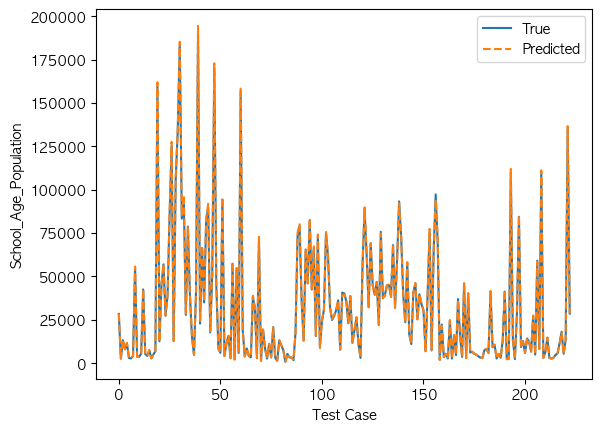

Mean Squared Error: 687447.29
Mean Absolute Percentage Error (MAPE): 1.54%


In [ ]:
# 예측
predicted_data = best_model.predict(predict_X)

# 예측 결과 역전환
#predicted_data = scaler.inverse_transform(predicted_data)
predicted_data = invTransform(scaler, predicted_data, '학령인구(명)', use_cols).reshape(-1, 1)
predicted_data = predicted_data.round()
#y_true = scaler.inverse_transform(y_test.reshape(-1, 1))
y_true = invTransform(scaler, predict_y, '학령인구(명)', use_cols).reshape(-1, 1)

# 결과 시각화
plt.plot(range(len(y_true)), y_true, label='True')
plt.plot(range(len(predicted_data)), predicted_data, label='Predicted', linestyle='--')
plt.xlabel('Test Case')
plt.ylabel('School_Age_Population')
plt.legend()
plt.show()

# 모델 평가
mse = mean_squared_error(y_true, predicted_data)
print(f'Mean Squared Error: {mse:.2f}')

# MAPE 계산 함수
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# MAPE 계산
mape = calculate_mape(y_true, predicted_data)
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')